In [1]:
cd /home/sumin/Downloads

/home/sumin/Downloads


In [2]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('/home/sumin/Downloads/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [4]:
df.shape

(50000, 10)

In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
#중복 데이터 확인
df.duplicated().sum()

126

In [7]:
df = df.drop_duplicates()
df.shape

(49874, 10)

In [8]:
#x,y,z 양수만 추출
df = df.drop(df[df["x"] <= 0].index)
df = df.drop(df[df["y"] <= 0].index)
df = df.drop(df[df["z"] <= 0].index)
df.shape

(49857, 10)

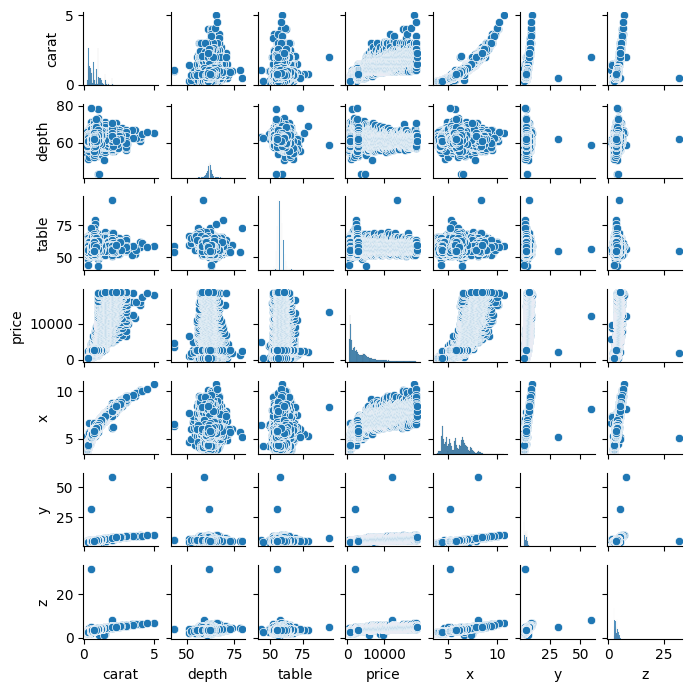

In [9]:
#outlier 확인
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.pairplot(df, height = 1)

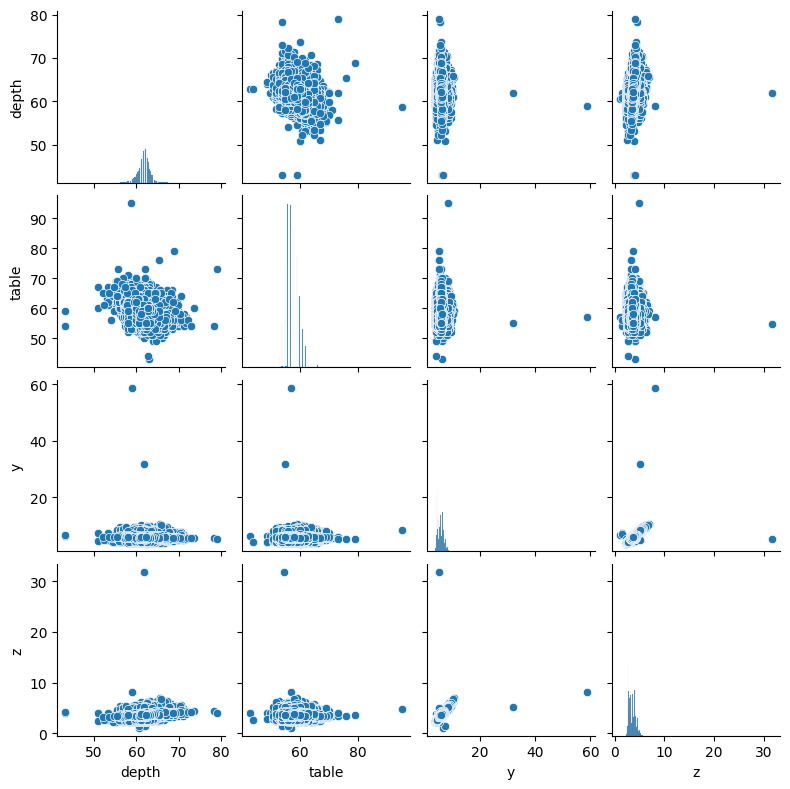

In [11]:
fig = sns.pairplot(df, vars = ['depth', 'table', 'y', 'z'], height = 2)

<Axes: ylabel='depth'>

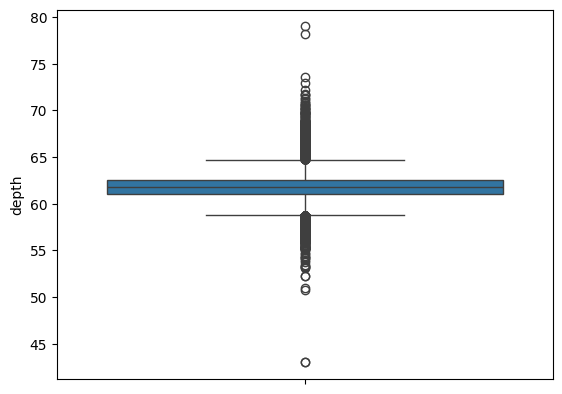

In [11]:
sns.boxplot(y=df['depth'])

In [10]:
#outlier 제거
df = df[(df["depth"] > 45) & (df["depth"] < 75)]
df = df[(df["table"] < 85)]
df = df[(df["y"] < 30)]
df = df[(df["z"] < 15)]
df.shape 

(49849, 10)

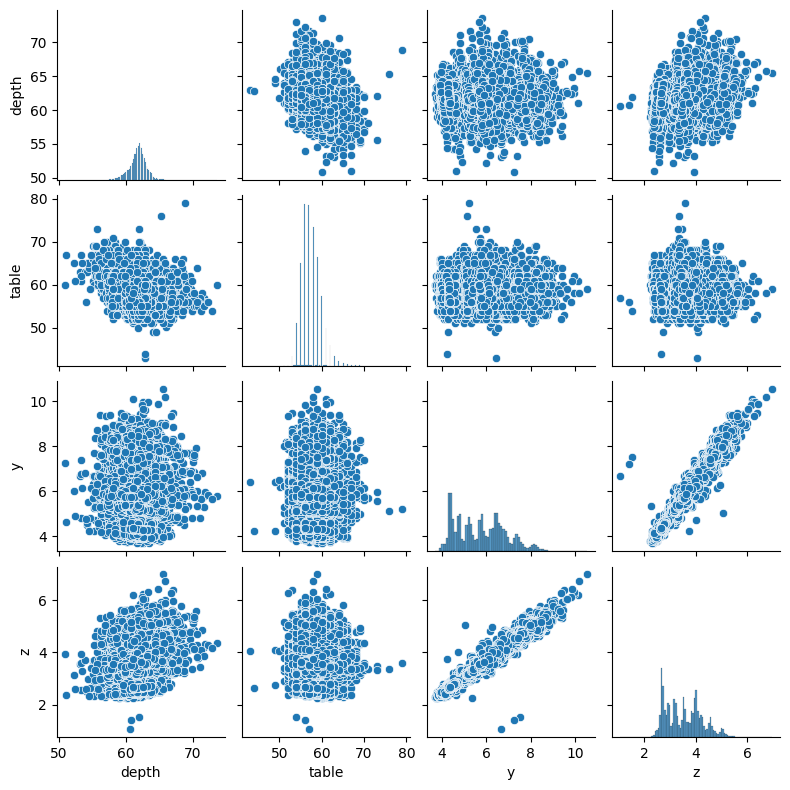

In [13]:
fig = sns.pairplot(df, vars = ['depth', 'table', 'y', 'z'], height = 2)

<Axes: >

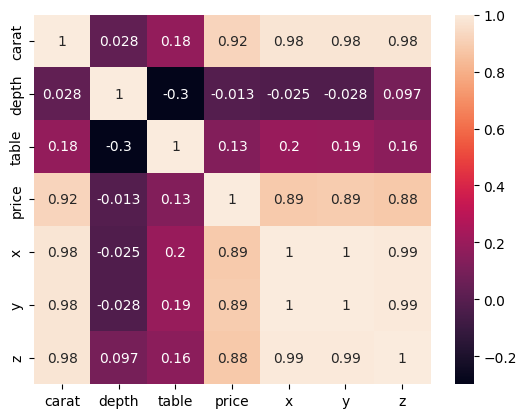

In [11]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(data = df_corr, annot = True, cbar = True)

In [12]:
#volume 추가 후 x,y,z drop.. 합쳐져야 의미가 있는것!(correlation 확인 후 진행..)
df['volume'] = df['x'] * df['y'] * df['z']
df.drop(columns = ['x','y','z'], axis=1, inplace=True)

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


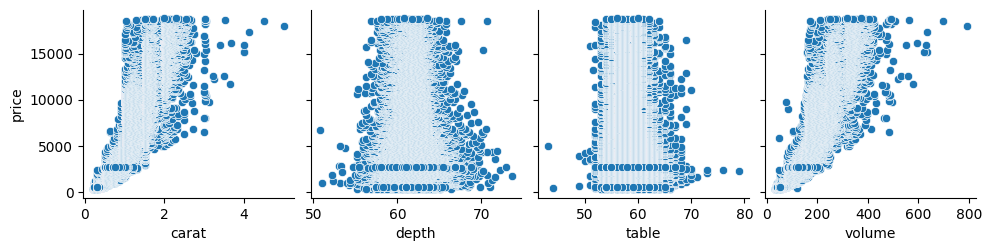

In [14]:
sns.pairplot(data = df, x_vars = [ "carat","depth","table",'volume'], y_vars = "price")

In [15]:
#One-hot encoding
X_ohe = pd.get_dummies(df, columns = ['cut', 'color', 'clarity'], dtype = int)
X_ohe.head(20)

,carat,depth,table,price,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,38.202030,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,34.505856,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,38.076885,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,46.724580,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,51.917250,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,38.693952,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
6,0.24,62.3,57.0,336,38.830870,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
7,0.26,61.9,55.0,337,42.321081,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,0.22,65.1,61.0,337,36.425214,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.23,59.4,61.0,338,38.718000,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [18]:
#original data
y = X_ohe["price"]
X = X_ohe.drop(["price"],axis=1)

In [19]:
#standard data
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler()
df_s =  pd.DataFrame(X_scaled.fit_transform(X_ohe[['carat','depth','table', 'volume']]), 
                            columns=['carat','depth','table', 'volume'],index = X_ohe.index)
df_s.head()

,carat,depth,table,volume
0,-1.199615,-0.177646,-1.105495,-1.199528
1,-1.241777,-1.375676,1.593381,-1.247813
2,-1.199615,-3.419373,3.392632,-1.201162
3,-1.073130,0.456605,0.243943,-1.088192
4,-1.030969,1.090856,0.243943,-1.020357


In [20]:
df_f = X_ohe.copy(deep=True)
df_f[['carat','depth', 'table', 'volume']] = df_s[['carat','depth','table', 'volume']]
df_f.head()

,carat,depth,table,price,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.199615,-0.177646,-1.105495,326,-1.199528,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.241777,-1.375676,1.593381,326,-1.247813,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.199615,-3.419373,3.392632,327,-1.201162,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.073130,0.456605,0.243943,334,-1.088192,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.030969,1.090856,0.243943,335,-1.020357,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [21]:
y_s = df_f['price']
X_s= df_f.drop(["price"],axis=1)
X_s.head()

,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.199615,-0.177646,-1.105495,-1.199528,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.241777,-1.375676,1.593381,-1.247813,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.199615,-3.419373,3.392632,-1.201162,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.073130,0.456605,0.243943,-1.088192,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.030969,1.090856,0.243943,-1.020357,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [22]:
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler()
df_m =  pd.DataFrame(X_scaled.fit_transform(X_ohe[['carat','depth','table', 'volume']]), 
                            columns=['carat','depth','table', 'volume'],index = X_ohe.index)
df_m.head()

,carat,depth,table,volume
0,0.006237,0.469298,0.333333,0.008563
1,0.002079,0.394737,0.500000,0.003689
2,0.006237,0.267544,0.611111,0.008398
3,0.018711,0.508772,0.416667,0.019800
4,0.022869,0.548246,0.416667,0.026646


In [23]:
df_mf = X_ohe.copy(deep=True)
df_mf[['carat','depth', 'table', 'volume']] = df_m[['carat','depth','table', 'volume']]
df_mf.head()

,carat,depth,table,price,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.469298,0.333333,326,0.008563,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.002079,0.394737,0.500000,326,0.003689,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.006237,0.267544,0.611111,327,0.008398,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.018711,0.508772,0.416667,334,0.019800,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.022869,0.548246,0.416667,335,0.026646,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [24]:
y_m = df_mf['price']
X_m= df_mf.drop(["price"],axis=1)
X_m.head()

,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.469298,0.333333,0.008563,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.002079,0.394737,0.500000,0.003689,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.006237,0.267544,0.611111,0.008398,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.018711,0.508772,0.416667,0.019800,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.022869,0.548246,0.416667,0.026646,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [26]:
X_scaled = np.log1p(X_ohe[['carat','depth','table', 'volume']])
df_l = pd.DataFrame(X_scaled)

df_lf = X_ohe.copy(deep=True)
df_lf[['carat','depth', 'table', 'volume']] = df_l[['carat','depth','table', 'volume']]
df_lf.head()

,carat,depth,table,price,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.207014,4.135167,4.025352,326,3.668729,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.190620,4.107590,4.127134,326,3.569698,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.207014,4.058717,4.189655,327,3.665531,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.254642,4.149464,4.077537,334,3.865447,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.270027,4.163560,4.077537,335,3.968729,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [27]:
y_l = df_lf['price']
X_l= df_lf.drop(["price"],axis=1)
X_l.head()

,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.207014,4.135167,4.025352,3.668729,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.190620,4.107590,4.127134,3.569698,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.207014,4.058717,4.189655,3.665531,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.254642,4.149464,4.077537,3.865447,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.270027,4.163560,4.077537,3.968729,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [29]:
#X scale method
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

def evaluate(X, y):
    alphas = [0.1, 1, 10, 100]
    for alpha in alphas:
        ridge = Ridge(alpha=alpha)
        neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
        rmse_scores = np.sqrt(-1 * neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        print(alpha, avg_rmse)

#original
print('original')
evaluate(X, y)
#standardscaler
print('StandardScaler')
evaluate(X_s, y_s)
#minmax
print('MinMaxScaler')
evaluate(X_m, y_m)
#log
print('Log')
evaluate(X_l, y_l)

original
0.1 1350.0328038883395
1 1349.792468060566
10 1348.0850640650124
100 1339.6924095414536
StandardScaler
0.1 1350.0456568773056
1 1349.9068026746668
10 1348.6072985922926
100 1340.882544005036
MinMaxScaler
0.1 1350.0697948881484
1 1350.58816419384
10 1357.2543068765337
100 1477.67584538219
Log
0.1 1389.3709687898515
1 1396.938192090472
10 1467.8284520766956
100 1798.6218282901082


<Axes: >

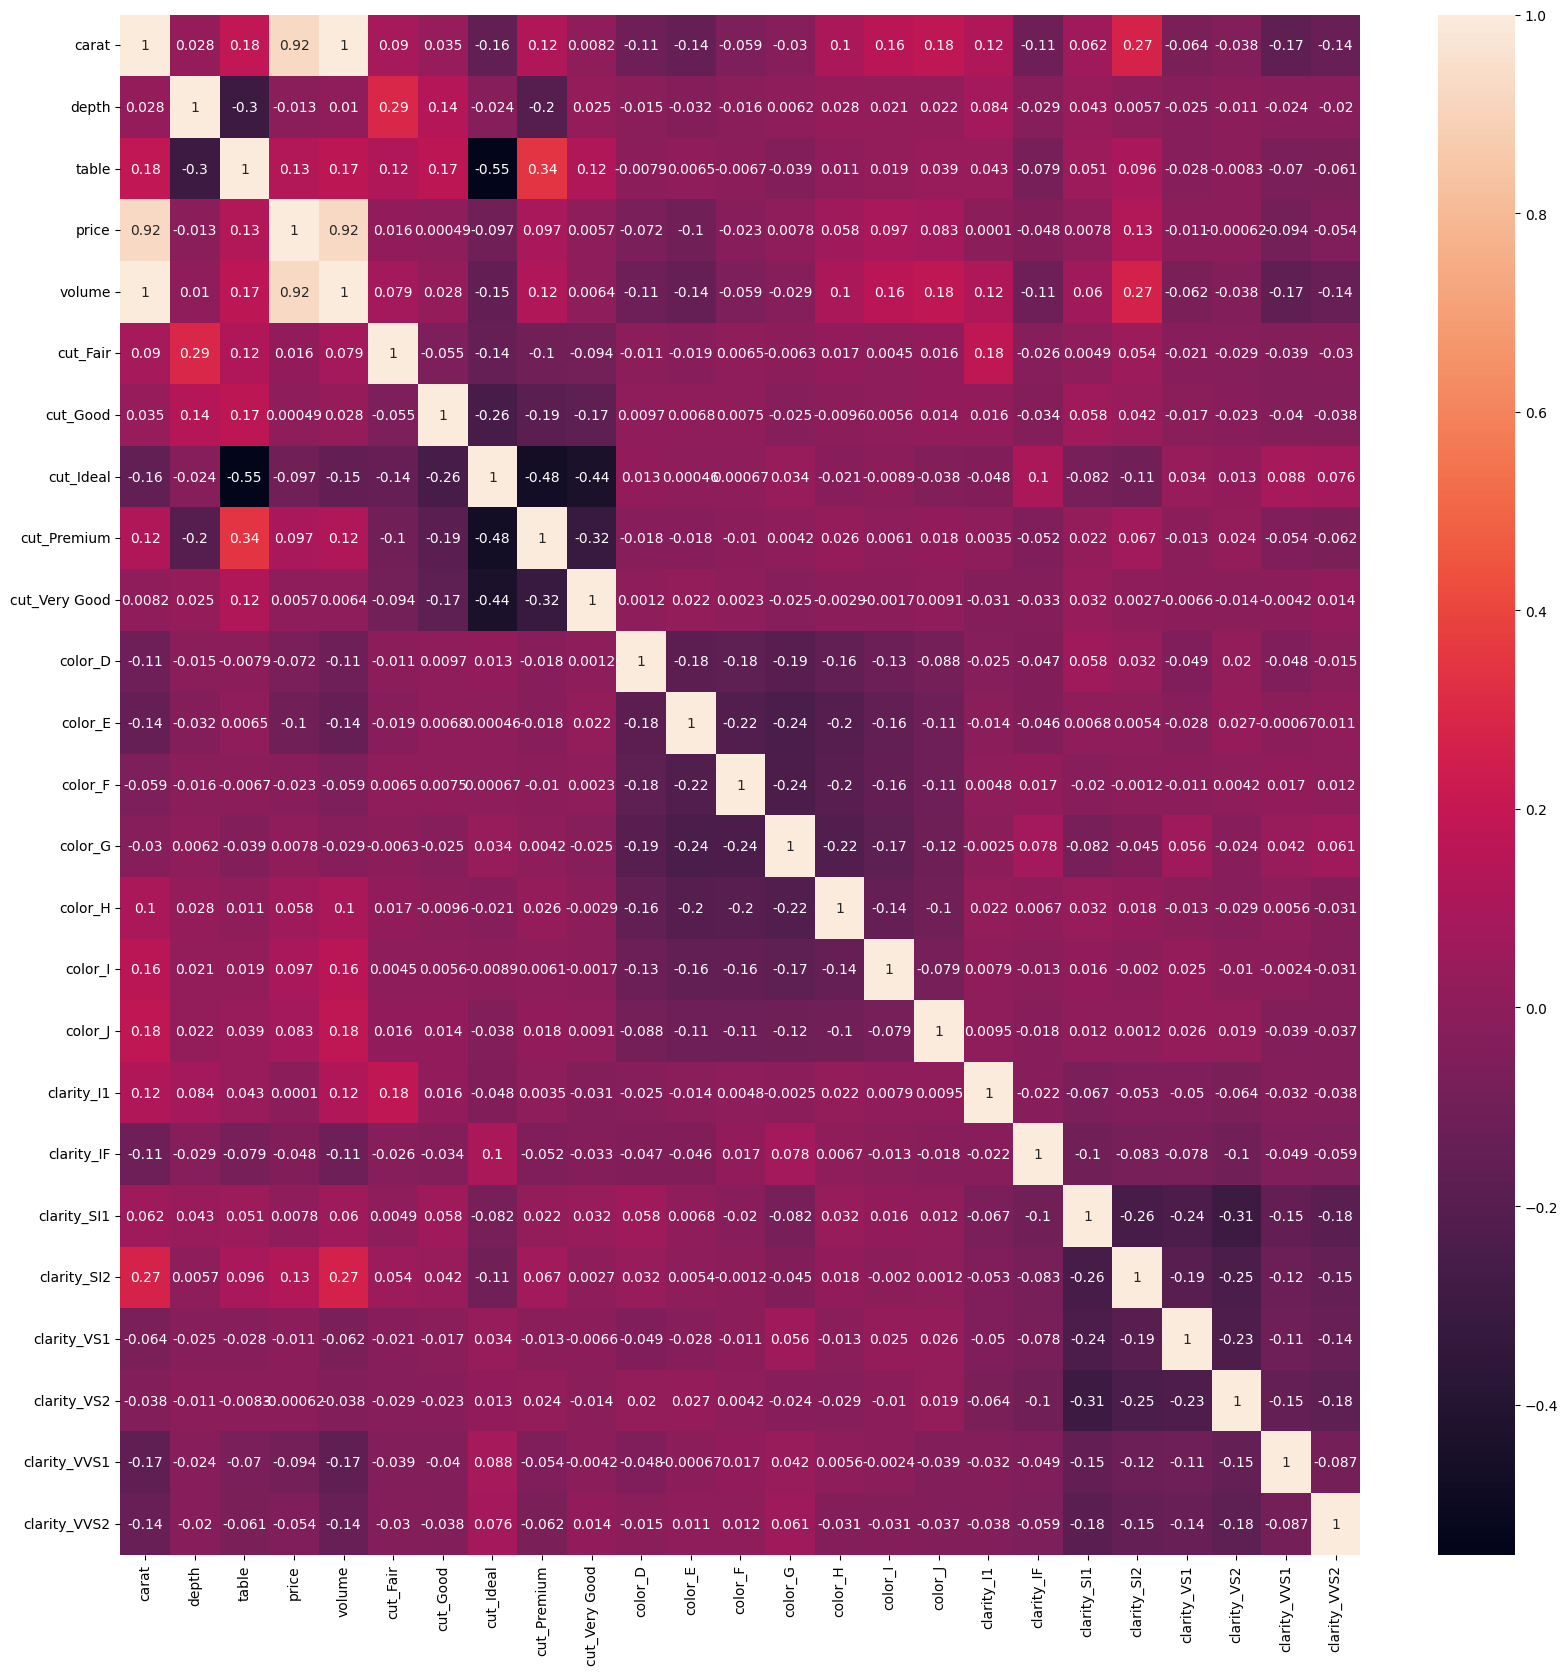

In [19]:
#최종 데이터
df_f = X_ohe.copy(deep=True)
df_f_corr = df_f.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(data = df_f_corr, annot = True, cbar = True)

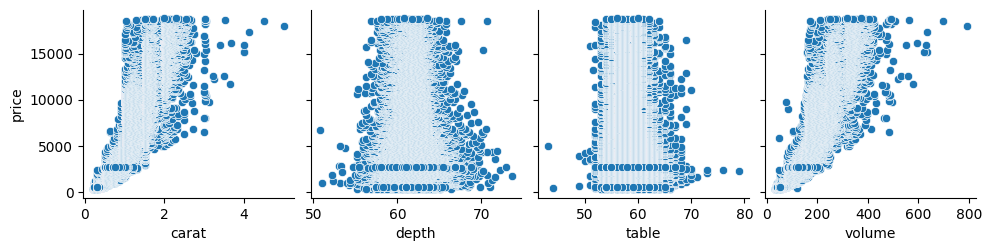

In [67]:
sns.pairplot(data = df_f, x_vars = [ "carat","depth","table",'volume'], y_vars = "price")

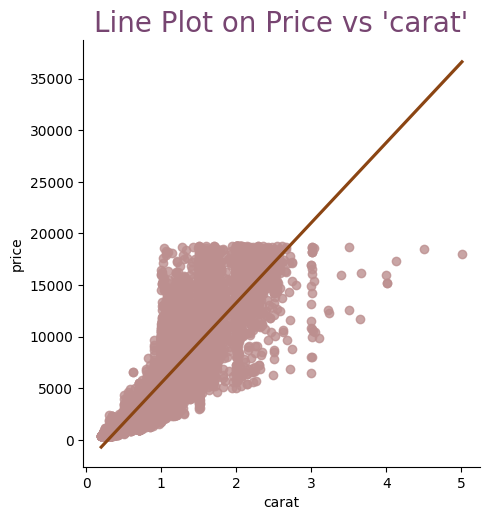

In [27]:
lm = sns.lmplot(x="price", y="carat", data=df_f, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'carat'", color="#774571", fontsize = 20)
plt.show()

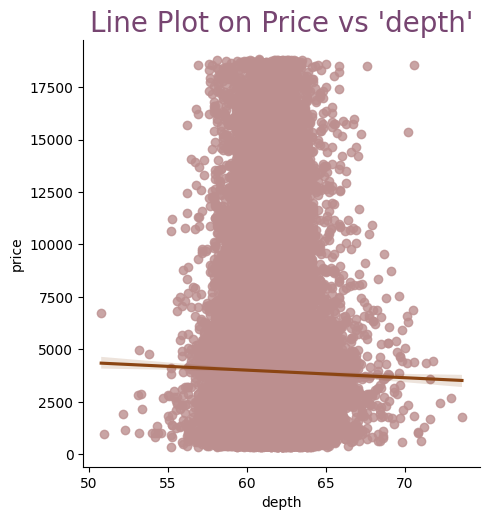

In [31]:
lm = sns.lmplot(x="price", y="depth", data=df_f, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

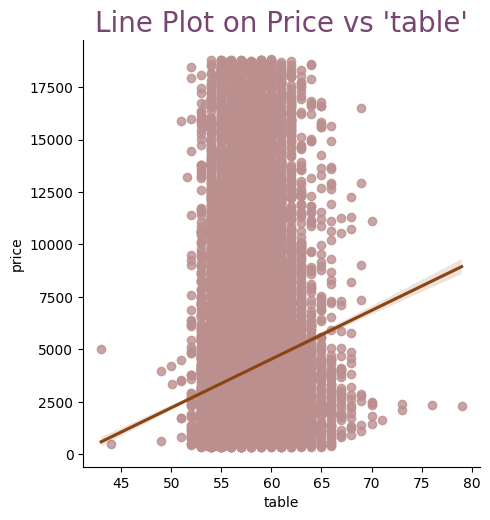

In [32]:
lm = sns.lmplot(x="price", y="table", data=df_f, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'table'", color="#774571", fontsize = 20)
plt.show()

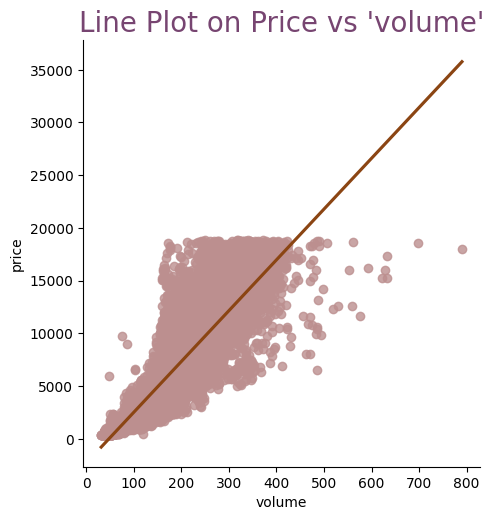

In [33]:
lm = sns.lmplot(x="price", y="volume", data=df_f, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'volume'", color="#774571", fontsize = 20)
plt.show()

In [20]:
#target data
y = df_f['price']
X = df_f.drop(["price"],axis=1)
X.head()

,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,38.202030,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,34.505856,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,38.076885,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,46.724580,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,51.917250,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [21]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

<Axes: >

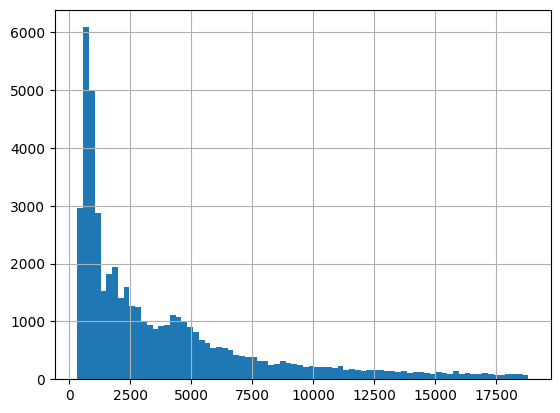

In [22]:
y.hist(bins='auto')

<Axes: >

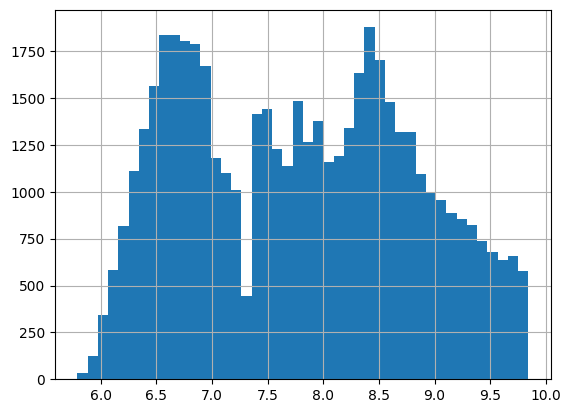

In [23]:
y_log = np.log1p(y)
y_log.hist(bins='auto')

In [35]:
#train과 test data로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y_log, test_size = 0.2, random_state = 42)

In [36]:
Y_test

31602    6.747587
29676    6.655440
8568     8.428143
44854    7.586804
20010    9.180396
           ...   
44005    7.531552
7122     8.361475
26154    6.502790
40445    7.268223
4066     6.349139
Name: price, Length: 9970, dtype: float64

In [37]:
#evaluate function
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(Y_test, y_hat):
    rmse = np.sqrt(mean_squared_error(Y_test, y_hat))
    mae = mean_absolute_error(Y_test, y_hat)
    r2 = r2_score(Y_test, y_hat)
    print(rmse, mae, r2)

In [60]:
#linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)
y_hat = lr.predict(X_test)
evaluate(Y_test, y_hat)

0.3364797045020841 0.2670263911485337 0.8900744004060476


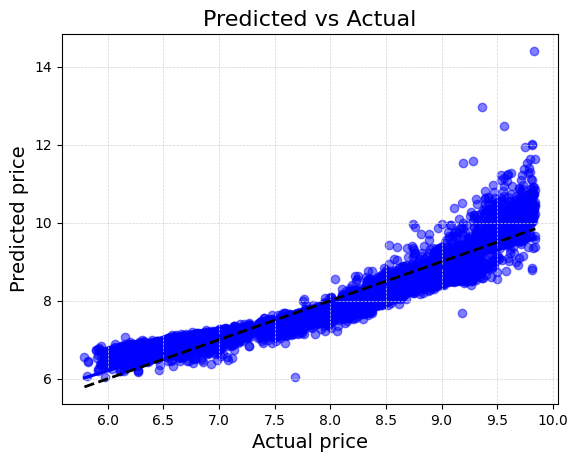

In [61]:
sns.regplot(x=Y_test, y=y_hat, color='blue', scatter_kws={'alpha':0.5})
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Predicted price', fontsize=14)
plt.title('Predicted vs Actual', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

In [42]:
#ridge kfold 교차검증 error
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [1, 10, 100, 1000, 10000]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X, y_log, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(alpha, avg_rmse)

1 0.41580590940410894
10 0.41536190856432764
100 0.41245173725545153
1000 0.40518312746390545
10000 0.41155276790424644


In [50]:
#Ridge
ridge = Ridge(alpha = 1000)
ridge.fit(X_train, Y_train)
y_hat_r = ridge.predict(X_test)
evaluate(Y_test, y_hat_r)

0.3437309034749405 0.27074342446412947 0.8852855163973145


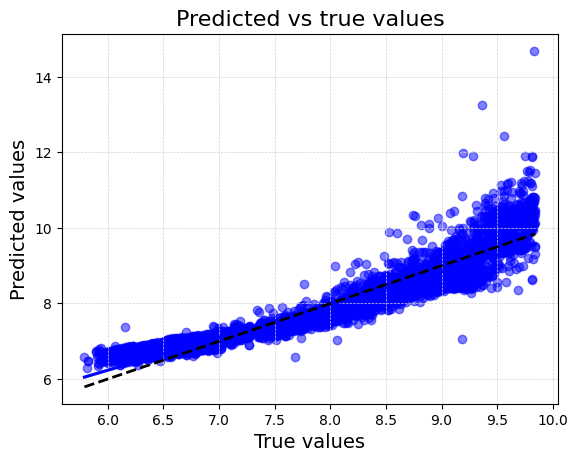

In [51]:
sns.regplot(x=Y_test, y=y_hat_r, color='blue', scatter_kws={'alpha':0.5})
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('True values', fontsize=14)
plt.ylabel('Predicted values', fontsize=14)
plt.title('Predicted vs true values', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

In [47]:
#lasso error
from sklearn.linear_model import Lasso

alphas = [0.003, 0.007, 0.01, 0.07, 0.1]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    neg_mse_scores = cross_val_score(lasso, X, y_log, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(alpha, avg_rmse)

0.003 0.40696196116658623
0.007 0.4065935321315185
0.01 0.40974097905625173
0.07 0.4226461140532181
0.1 0.42259529288996156


In [48]:
#lasso
lasso = Lasso(alpha = 0.007)
lasso.fit(X_train, Y_train)
y_hat = lasso.predict(X_test)
evaluate(Y_test, y_hat)

0.3517151383098857 0.27480031168184943 0.8798944108196145


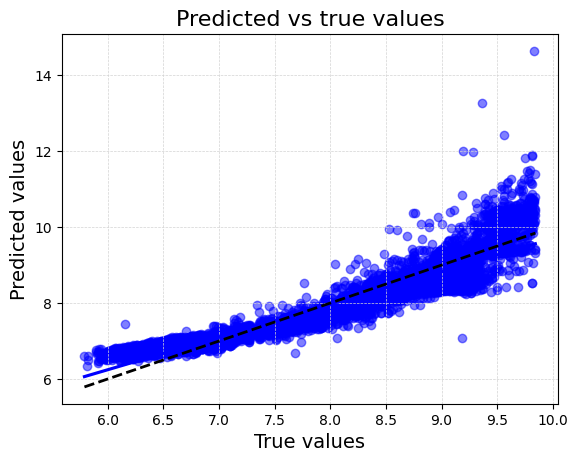

In [49]:
sns.regplot(x=Y_test, y=y_hat, color='blue', scatter_kws={'alpha':0.5})
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('True values', fontsize=14)
plt.ylabel('Predicted values', fontsize=14)
plt.title('Predicted vs true values', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

In [43]:
from sklearn.linear_model import ElasticNet

alphas = [0.003, 0.007, 0.01, 0.07, 0.1, 0.5]
for alpha in alphas:
    net = ElasticNet(alpha=alpha, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(net, X, y_log, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(alpha, avg_rmse)

0.003 0.4079854187089332
0.007 0.40512358581240615
0.01 0.4066793821670169
0.07 0.422681351046396
0.1 0.42264522857592424
0.5 0.42218645550507483


In [44]:
net = ElasticNet(alpha = 0.007, l1_ratio=0.7)
net.fit(X_train, Y_train)
y_hat = net.predict(X_test)
evaluate(Y_test, y_hat)

0.34651460138014634 0.27154215003126475 0.8834199668631282


In [52]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000)
rf.fit(X_train, Y_train)
y_hat = rf.predict(X_test)
evaluate(Y_test, y_hat)

0.11523215687952391 0.08341569717926915 0.9871077571646646


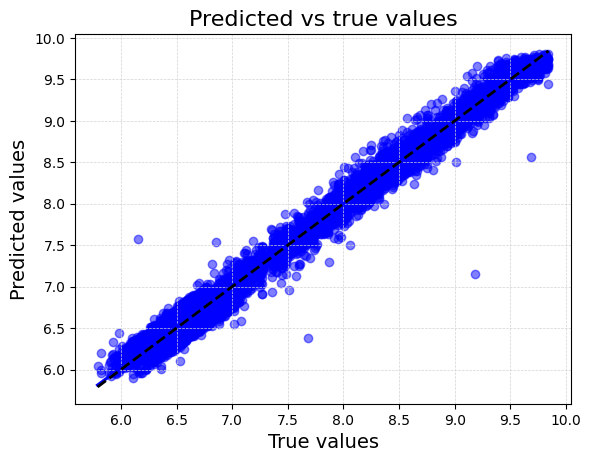

In [55]:
sns.regplot(x=Y_test, y=y_hat, color='blue', scatter_kws={'alpha':0.5})
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('True values', fontsize=14)
plt.ylabel('Predicted values', fontsize=14)
plt.title('Predicted vs true values', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

<BarContainer object of 10 artists>

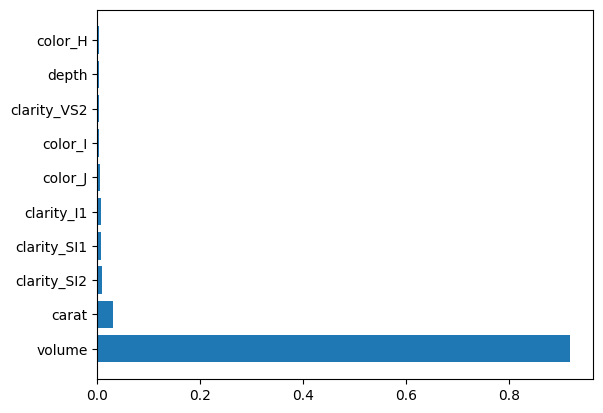

In [48]:
#feature importance
imp_values = rf.feature_importances_
imp = pd.DataFrame(data=imp_values, columns=['value'])
imp['name'] = X_train.columns
top10 = imp.sort_values(by='value', ascending=False)[:10]
plt.barh(top10['name'], top10['value'])

In [49]:
#XGB
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, learning_rate=0.03, colsample_bytree=0.5, subsample=0.7)
xgb.fit(X_train, Y_train)
y_hat = xgb.predict(X_test)
evaluate(Y_test, y_hat)

0.10802424297060828 0.08238982173095022 0.9886701657017072


In [51]:
#gridsearchCV func
from sklearn.model_selection import GridSearchCV

def grid_search_cv(model, X, y, params):
    cv = GridSearchCV(model, param_grid = params, scoring = 'neg_mean_squared_error', cv=5)
    cv.fit(X, y)
    rmse = np.sqrt(-1 * cv.best_score_)
    print(rmse)
    print(cv.best_params_)

In [68]:
xgb_params = {
    'n_estimators': [1000, 1500, 2000],
    'learning_rate': [0.05, 0.07, 0.09],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'subsample': [0.7, 0.8, 0.9]
}
xgb = XGBRegressor()
grid_search_cv(xgb, X, y_log, xgb_params)

0.18916976862192864
{'colsample_bytree': 0.3, 'learning_rate': 0.05, 'n_estimators': 2000, 'subsample': 0.8}


In [62]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=2000, learning_rate=0.05, colsample_bytree=0.3, subsample=0.8)
xgb.fit(X_train, Y_train)
y_hat = xgb.predict(X_test)
evaluate(Y_test, y_hat)

0.10064697296750173 0.07493387849063075 0.9901648150621689


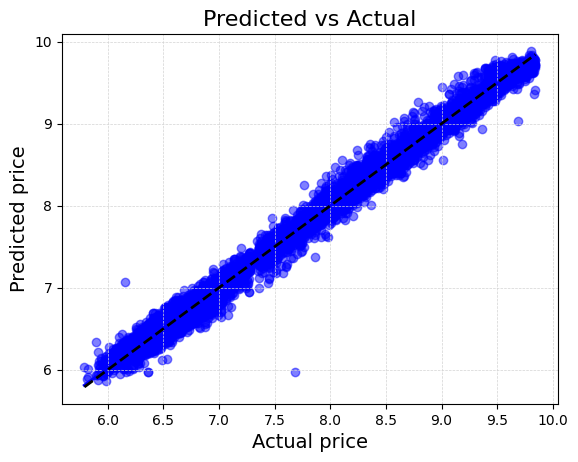

In [65]:
sns.regplot(x=Y_test, y=y_hat, color='blue', scatter_kws={'alpha':0.5})
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Predicted price', fontsize=14)
plt.title('Predicted vs Actual', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

In [72]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=500, learning_rate=0.05, colsample_bytree=0.3, subsample=0.7, 
                     num_leaves=4, reg_lambda=10, force_col_wise = True)
lgbm.fit(X_train, Y_train)
y_hat = lgbm.predict(X_test)
evaluate(Y_test, y_hat)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.791257
0.12002276478016544 0.09309651173974079 0.986013522573793


In [73]:
lgbm_params = {
    'n_estimators': [1000, 1500, 2000],
    'learning_rate': [0.03, 0.05, 0.07],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'subsample': [0.7, 0.8],
    'num_leaves': [3, 4],
    'reg_lambda': [5, 10]
}
lgbm = LGBMRegressor()
grid_search_cv(lgbm, X, y_log, lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [In

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [In

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000742 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [In

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [In

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [In

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [In

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.729570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [In

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 8.025851
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 39880, number of used features: 24
[LightGBM] [Info] Start training from score 7.871418
[LightGBM] [Warning] Found whi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.597273
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.726117
[LightGBM] [Warning] Found whi

In [79]:
lgbm = LGBMRegressor(n_estimators=2000, learning_rate=0.07, colsample_bytree=0.3, subsample=0.7, 
                     num_leaves=3, reg_lambda=5, force_col_wise = True)
lgbm.fit(X_train, Y_train)
y_hat = lgbm.predict(X_test)
evaluate(Y_test, y_hat)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 39879, number of used features: 24
[LightGBM] [Info] Start training from score 7.791257
0.1108153188064697 0.08488040023474923 0.9880771331008853
